In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Give good variable names
X_train = pd.DataFrame(load_boston().data).head(400)
y_train = pd.DataFrame(load_boston().target).head(400)

In [3]:
#display how the variable looks
X_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#display how the variable looks
y_train.head(5)

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
X_test = pd.DataFrame(load_boston().data).tail(105)
y_test = pd.DataFrame(load_boston().target).tail(105)

In [6]:
#Convert into numpy array
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

In [7]:
#least squares weight
inv = np.linalg.inv(np.dot(X_train.T, X_train))
theta = np.dot(np.dot(inv, X_train.T), y_train)
theta.shape

(13, 1)

In [8]:
y_pred = np.dot(X_test, theta)
y_pred.shape

(105, 1)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

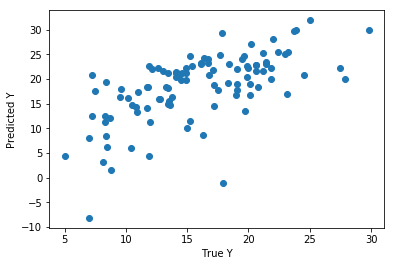

In [10]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Y')
plt.ylabel('Predicted Y');

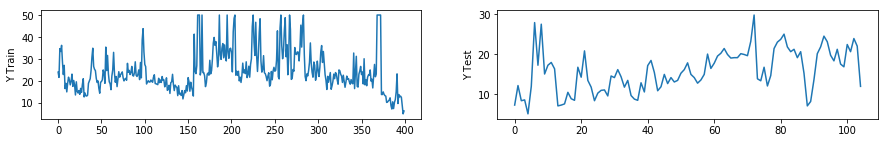

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15,2))
ax[0].plot(y_train)
ax[0].set_ylabel('Y Train')
ax[1].plot(y_test)
ax[1].set_ylabel('Y Test');

In [12]:

X = pd.DataFrame(load_boston().data)
y = pd.DataFrame(load_boston().target)
X = X.as_matrix()
y = y.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 92) 
                                                                                              
                                                                    

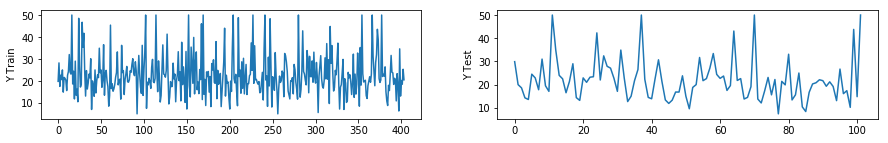

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15,2))
ax[0].plot(y_train)
ax[0].set_ylabel('Y Train')
ax[1].plot(y_test)
ax[1].set_ylabel('Y Test');

In [14]:
inv = np.linalg.inv(np.dot(X_train.T, X_train))
theta = np.dot(np.dot(inv, X_train.T), y_train)
y_pred = np.dot(X_test, theta)
r2_score(y_test, y_pred)

0.7327908795757333

In [16]:
X_train.shape

(404, 13)

In [17]:
X_train_poly = np.zeros((404, 52))
for i in range(13):
    X_train_poly[:, i] = X_train[:, i]
    X_train_poly[:, i+13] = X_train[:, i] ** 2
    X_train_poly[:, i+26] = X_train[:, i] ** 3
    X_train_poly[:, i+39] = X_train[:, i] ** 4
X_train_poly.shape

(404, 52)

In [18]:
X_test.shape

(102, 13)

In [19]:
X_test_poly = np.zeros((102, 52))
for i in range(13):
    X_test_poly[:, i] = X_test[:, i]
    X_test_poly[:, i+13] = X_test[:, i] ** 2
    X_test_poly[:, i+26] = X_test[:, i] ** 3
    X_test_poly[:, i+39] = X_test[:, i] ** 4

In [20]:
X_test_poly.shape

(102, 52)

In [21]:
inv = np.linalg.inv(np.dot(X_train_poly.T, X_train_poly))
theta = np.dot(np.dot(inv, X_train_poly.T), y_train)
y_pred = np.dot(X_test_poly, theta)
r2_score(y_test, y_pred)

-6.313048298499282e+20

In [22]:
for i in range(-3,1,1) :
    inv = np.linalg.inv(np.dot(X_train_poly.T, X_train_poly) + (10 ** i) * np.identity(52))
    theta = np.dot(np.dot(inv, X_train_poly.T), y_train)
    y_pred = np.dot(X_test_poly, theta)
    print (r2_score(y_test, y_pred))

0.837281466376
0.834467637314
0.829157590054
0.823489298864
